In [3]:
import numpy as np
import os

In [4]:
print(os.getcwd())

/Users/syshin/Desktop/Himedia/Himedia_project/이미지분류


In [5]:
os.chdir(os.getcwd()+"/travel_images")

In [6]:
os.getcwd()

'/Users/syshin/Desktop/Himedia/Himedia_project/이미지분류/travel_images'

In [7]:
data_dir=os.getcwd()

In [8]:
import glob

In [9]:
data_list=glob.glob('*.*')

In [10]:
data_list[:5]

['architecture (5003).jpg',
 'art_and_culture (1330).jpg',
 'travel_and_adventure (4754).jpg',
 'travel_and_adventure (3091).jpg',
 'art_and_culture (681).jpg']

In [11]:
len(data_list)

35035

In [12]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [13]:
# string을 특정한 기준에 의해 token으로 끊어 리스트를 리턴
token=text_to_word_sequence(data_list[0])

In [14]:
token

['architecture', '5003', 'jpg']

In [15]:
token[0]

'architecture'

In [16]:
text_to_word_sequence(data_list[9999], filters='()')

['architecture', '1498', '.jpg']

In [17]:
label=[]
for x in data_list:
    label.append(text_to_word_sequence(x, filters='()')[0])

In [18]:
label[:5]

['architecture',
 'art_and_culture',
 'travel_and_adventure',
 'travel_and_adventure',
 'art_and_culture']

In [19]:
len(label)

35035

In [20]:
# 라벨 인코더 - 카테고리형 문자를 숫자로 자동 변환해주는 역할
from sklearn.preprocessing import LabelEncoder

In [21]:
encoder=LabelEncoder()
label_encode=encoder.fit_transform(label)

In [22]:
encoder.classes_ # 인코딩된 분류 이름들

array(['architecture', 'art_and_culture', 'best_cnn_1.h5',
       'food_and_drinks', 'travel_and_adventure'], dtype='<U20')

In [23]:
label_encode[:5]

array([0, 1, 4, 4, 1])

In [24]:
import cv2
import matplotlib.pyplot as plt

In [25]:
img=cv2.imread(data_list[0])

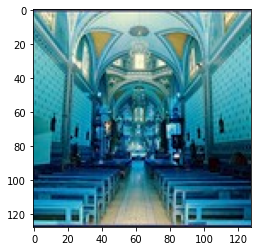

In [26]:
plt.imshow(img)

In [71]:
img.shape # 사진이 컬러인 경우 => 3, 흑백인 경우 => 1

(128, 128, 3)

In [72]:
# 표준화
img=img/255

In [73]:
img[0][0]

array([0.23529412, 0.22745098, 0.43137255])

In [74]:
# 크기를 동일하게 맞추어 변경해주자
data_height=150
data_width=150
channel_n=3 # 컬러 색상으로 설정

In [75]:
img_resize=cv2.resize(img, (data_height, data_width))

In [76]:
img_resize.shape

(150, 150, 3)

In [2]:
# 사진 35093개의 크기를 모두 변경
resize_list=[]
error_list=[]
i=9000
for x in data_list:
    try:
        one=cv2.imread(x)/255
        resize=cv2.resize(one, (data_height, data_width))
        resize_list.append(resize)
        i=i+1
    except:
        error_list.append((i,x))
        i=i+1
        pass

NameError: name 'data_list' is not defined

In [78]:
error_list

[]

In [79]:
resize_list=[]
error_list=[]
for x in data_list[9000:10000]:
    one=cv2.imread(x)/255
    resize=cv2.resize(one, (data_height, data_width))
    resize_list.append(resize)

libpng warning: iCCP: known incorrect sRGB profile


In [80]:
error_img=cv2.imread(data_list[9123])

In [81]:
type(error_img)

numpy.ndarray

In [82]:
# 사진 35093개의 크기를 모두 변경
resize_list=[]
error_list=[]
i=9000
for x in data_list:
    try:
        one=cv2.imread(x)/255
        resize=cv2.resize(one, (data_height, data_width))
        resize_list.append(resize)
        i=i+1
    except:
        error_list.append((i,x))
        i=i+1
        pass

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: kno

In [83]:
len(error_list)

0

In [84]:
type(error_list[0][1])

IndexError: list index out of range

In [ ]:
error_list[0][1]

In [ ]:
# Nontype 이미지 제거
os.remove(error_list[0][1])

In [ ]:
# Nontype 이미지 전부 제거
for i in range(1, len(error_list)):
    os.remove(error_list[i][1])

In [85]:
error_list

[]